In [3]:
import tensorflow as tf 
import tensorflow_datasets as tfds

In [45]:
datos, metadatos = tfds.load('stanford_dogs', as_supervised = True, with_info= True) #Importacion del set de datos de Tensorflow


# Citación a autores del set de datos
@inproceedings{KhoslaYaoJayadevaprakashFeiFei_FGVC2011,
author = "Aditya Khosla and Nityananda Jayadevaprakash and Bangpeng Yao and
          Li Fei-Fei",
title = "Novel Dataset for Fine-Grained Image Categorization",
booktitle = "First Workshop on Fine-Grained Visual Categorization,
             IEEE Conference on Computer Vision and Pattern Recognition",
year = "2011",
month = "June",
address = "Colorado Springs, CO",
}
@inproceedings{imagenet_cvpr09,
        AUTHOR = {Deng, J. and Dong, W. and Socher, R. and Li, L.-J. and
                  Li, K. and Fei-Fei, L.},
        TITLE = { {ImageNet: A Large-Scale Hierarchical Image Database} },
        BOOKTITLE = {CVPR09},
        YEAR = {2009},
        BIBSOURCE = "http://www.image-net.org/papers/imagenet_cvpr09.bib"}

In [40]:
metadatos

tfds.core.DatasetInfo(
    name='stanford_dogs',
    version=0.2.0,
    description='The Stanford Dogs dataset contains images of 120 breeds of dogs from around
the world. This dataset has been built using images and annotation from
ImageNet for the task of fine-grained image categorization. There are
20,580 images, out of which 12,000 are used for training and 8580 for
testing. Class labels and bounding box annotations are provided
for all the 12,000 images.',
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
            'bbox': BBoxFeature(shape=(4,), dtype=tf.float32),
        }),
    }),
    total_num_examples=20580,
    splits={
        'test': 8580,
        'train': 12000,
    },
    supervised_keys=('image'

In [42]:
nombres_razas = metadatos.features['label'].names#Se guarda en variable cada una de la etiquetas existentes en imagenes de los metadatos

In [43]:
nombres_razas

['n02085620-chihuahua',
 'n02085782-japanese_spaniel',
 'n02085936-maltese_dog',
 'n02086079-pekinese',
 'n02086240-shih-tzu',
 'n02086646-blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-rhodesian_ridgeback',
 'n02088094-afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-walker_hound',
 'n02089973-english_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-irish_wolfhound',
 'n02091032-italian_greyhound',
 'n02091134-whippet',
 'n02091244-ibizan_hound',
 'n02091467-norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-saluki',
 'n02092002-scottish_deerhound',
 'n02092339-weimaraner',
 'n02093256-staffordshire_bullterrier',
 'n02093428-american_staffordshire_terrier',
 'n02093647-bedlington_terrier',
 'n02093754-border_terrier',
 'n02093859-kerry_blue_terrier',
 'n02093991-irish_terrier',
 'n02094114-norfolk_terrier',
 'n02094258-norwi

El siguiente bloque de codigo manipula las imagenes y muestra graficamente la manipulacion hecha en una matriz de 5*5.

Se modifican las imagenes a diferentes tamaño y color, para poder hacer un entrenamiento posterior mas eficiente.

Manejar las imagenes a blanco y negro hará que el entrenamiento sea menos tardado

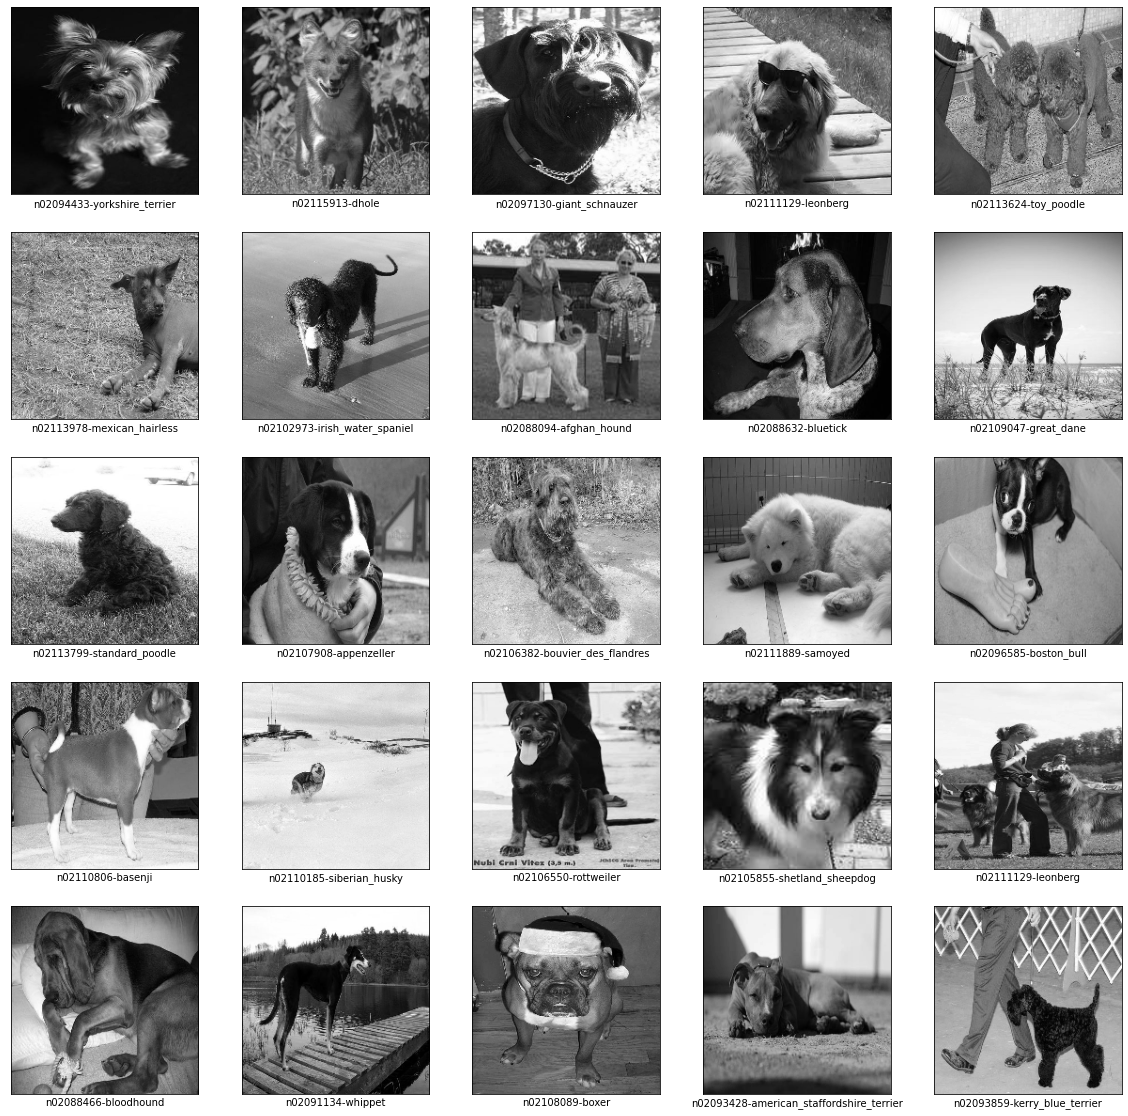

In [44]:
import matplotlib.pyplot as plt
import cv2


plt.figure(figsize = (20,20)) # Hace mas grandes las imágenes
tamaño_imgns = 200

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)): #Itera por cada imagen y etiqueta en los datos de entrenamiento
    imagen = cv2.resize(imagen.numpy(), (tamaño_imgns,tamaño_imgns)) #Redimensiona las imagenes a 200*200
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Designa el canal de color a grises
    plt.subplot(5,5,i + 1) #Ordena en matriz de filas y columnas
    plt.xticks([]) #Elimina valores de los ejes X y Y por defecto
    plt.yticks([])
    plt.xlabel(nombres_razas[etiqueta]) #Muestra en el eje X, la etiqueta de cada raza
    plt.imshow(imagen,cmap= 'gray') #Muestra imagenes en gris